In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [2]:
# Deleting background pixels.

def delbg(x):
    requiredcolumns = x.iloc[:,0:256]
    rowSum = requiredcolumns.sum(axis=1)
    filteredX = x[rowSum!=0]
    return(filteredX)

In [3]:
image01 = pd.read_csv("C:/Users/venka/OneDrive/Desktop/Big Data/CSV files/image01.csv")
del image01['Unnamed: 0']
image01

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,124,108,83,72,56,39,29,17,13,12,...,26,29,44,72,62,59,48,32,35,1
386,18,26,31,34,30,31,32,31,40,35,...,0,0,0,0,0,0,0,0,0,1
387,52,60,73,71,51,32,31,36,36,40,...,0,0,0,0,0,0,0,0,0,1
388,50,48,42,34,26,12,2,9,20,36,...,0,0,0,0,0,0,0,0,0,1


In [4]:
slidingImage01 = pd.read_csv("C:/Users/venka/OneDrive/Desktop/Big Data/CSV files/slidingImage01.csv")
del slidingImage01['Unnamed: 0']
slidingImage01

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99835,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
99836,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
99837,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
99838,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [5]:
image01 = delbg(image01)
slidingImage01 = delbg(slidingImage01)

In [6]:
cardinalFeatureV = pd.read_csv("C:/Users/venka/OneDrive/Desktop/Big Data/CSV files/cardinalFeatureV.csv")
crestedFeatureV = pd.read_csv("C:/Users/venka/OneDrive/Desktop/Big Data/CSV files/crestedFeatureV.csv")
sparrowFeatureV = pd.read_csv("C:/Users/venka/OneDrive/Desktop/Big Data/CSV files/sparrowFeatureV.csv")
cardinalSlidingFeatureV = pd.read_csv("C:/Users/venka/OneDrive/Desktop/Big Data/CSV files/cardinalSlidingFeatureV.csv")
crestedSlidingFeatureV = pd.read_csv("C:/Users/venka/OneDrive/Desktop/Big Data/CSV files/crestedSlidingFeatureV.csv")
sparrowSlidingFeatureV = pd.read_csv("C:/Users/venka/OneDrive/Desktop/Big Data/CSV files/sparrowSlidingFeatureV.csv")

In [7]:
cardinalFeatureV = delbg(cardinalFeatureV)
crestedFeatureV = delbg(crestedFeatureV)
sparrowFeatureV = delbg(sparrowFeatureV)
cardinalSlidingFeatureV = delbg(cardinalSlidingFeatureV)
crestedSlidingFeatureV = delbg(crestedSlidingFeatureV)
sparrowSlidingFeatureV = delbg(sparrowSlidingFeatureV)

In [8]:
# Functions for selecting features.

def featureSelection(x,y):
    xStd = x.iloc[:,0:256].std()
    yStd = y.iloc[:,0:256].std()
    diff = abs(xStd - yStd)
    sortedDiff = diff.sort_values()
    return(sortedDiff)
    

In [9]:
# feature selection for Cardinal and Crested Auklet for block features.

feature01 = featureSelection(cardinalFeatureV, crestedFeatureV)
feature01

117    12.682485
92     12.740668
61     12.846538
48     12.866883
71     14.561125
         ...    
248    29.783768
2      29.913091
166    31.029211
252    31.401154
222    31.741827
Length: 256, dtype: float64

In [10]:
# Feature selection for Cardinal and Crested Auklet for sliding features.
featureSliding01 = featureSelection(cardinalSlidingFeatureV, crestedSlidingFeatureV)
featureSliding01

15     21.371280
13     21.371280
14     21.371280
11     21.371280
10     21.371280
         ...    
246    21.802139
245    21.805211
244    21.809279
243    21.814946
242    21.815194
Length: 256, dtype: float64

In [11]:
# splitting the data set for training and testing.

train01, test01 = train_test_split(image01, test_size=0.2, random_state=100)
train01.to_csv('C:/Users/venka/OneDrive/Desktop/Big Data/CSV files/train01.csv', index=False)
test01.to_csv('C:/Users/venka/OneDrive/Desktop/Big Data/CSV files/test01.csv', index=False)

In [12]:
trainSliding01, testSliding01 = train_test_split(slidingImage01, test_size=0.2, random_state=1000)
trainSliding01.to_csv('C:/Users/venka/OneDrive/Desktop/Big Data/CSV files/trainSliding01.csv', index = False)
testSliding01.to_csv('C:/Users/venka/OneDrive/Desktop/Big Data/CSV files/testSliding01.csv', index = False)

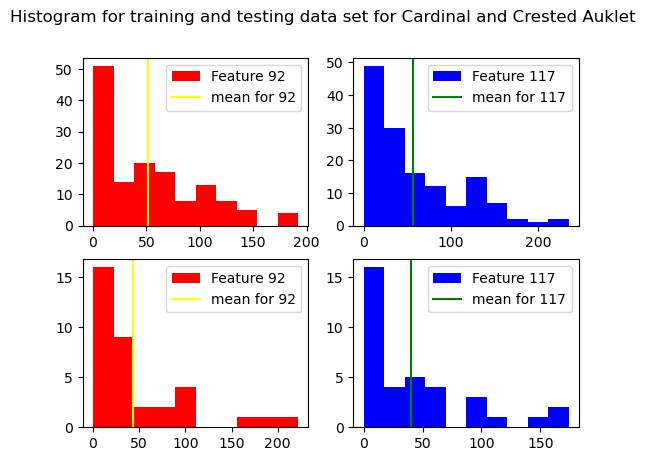

In [13]:
# Plotting histogram for train01 and test01 for block features for feature numbers 92 and 117.

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2)
ax1.hist(train01['92'], color='red', label='Feature 92')
ax2.hist(train01['117'], color='blue', label='Feature 117')
ax1.axvline(train01['92'].mean(), color='yellow', label='mean for 92')
ax2.axvline(train01['117'].mean(), color='green', label='mean for 117')
ax3.hist(test01['92'], color='red', label='Feature 92')
ax4.hist(test01['117'], color='blue', label='Feature 117')
ax3.axvline(test01['92'].mean(), color='yellow', label='mean for 92')
ax4.axvline(test01['117'].mean(), color='green', label='mean for 117')
plt.suptitle('Histogram for training and testing data set for Cardinal and Crested Auklet')

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()

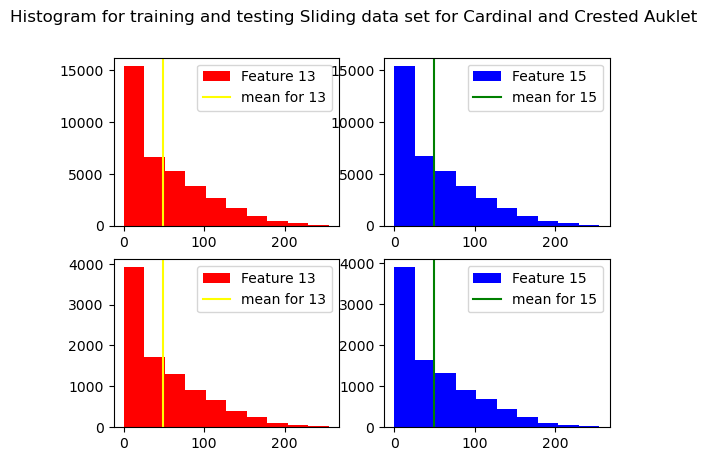

In [14]:
# Plotting histogram for train01 and test01 for sliding features for feature numbers 13 and 15.

fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2,2)
ax1.hist(trainSliding01['13'], color='red', label='Feature 13')
ax2.hist(trainSliding01['15'], color='blue', label='Feature 15')
ax1.axvline(trainSliding01['13'].mean(), color='yellow', label='mean for 13')
ax2.axvline(trainSliding01['15'].mean(), color='green', label='mean for 15')
ax3.hist(testSliding01['13'], color='red', label='Feature 13')
ax4.hist(testSliding01['15'], color='blue', label='Feature 15')
ax3.axvline(testSliding01['13'].mean(), color='yellow', label='mean for 13')
ax4.axvline(testSliding01['15'].mean(), color='green', label='mean for 15')
plt.suptitle('Histogram for training and testing Sliding data set for Cardinal and Crested Auklet')

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()

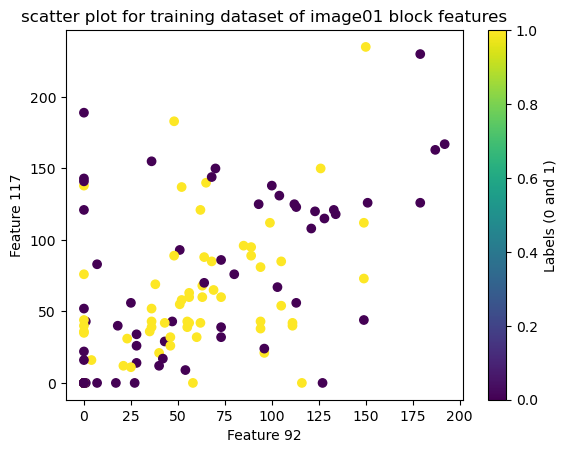

In [15]:
# plotting scatter plot for features.

plt.scatter(train01['92'], train01['117'], label='train scatter plot', c= train01['label'])
colorbar = plt.colorbar()
colorbar.set_label('Labels (0 and 1)')
plt.xlabel('Feature 92')
plt.ylabel('Feature 117')
plt.title('scatter plot for training dataset of image01 block features')
plt.show()

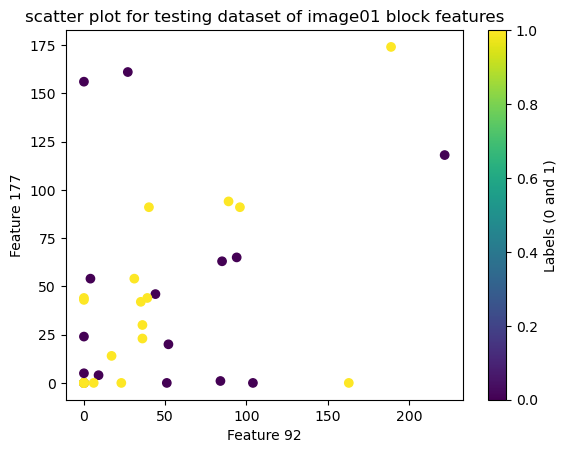

In [16]:
plt.scatter(test01['92'], test01['117'], c= test01['label'])
colorbar = plt.colorbar()
colorbar.set_label('Labels (0 and 1)')
plt.xlabel('Feature 92')
plt.ylabel('Feature 177')
plt.title('scatter plot for testing dataset of image01 block features')
plt.show()

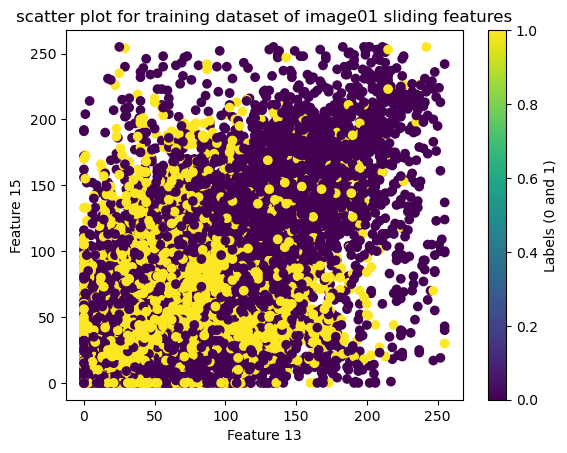

In [17]:
plt.scatter(trainSliding01['13'], trainSliding01['15'], c= trainSliding01['label'])
colorbar = plt.colorbar()
colorbar.set_label('Labels (0 and 1)')
plt.xlabel('Feature 13')
plt.ylabel('Feature 15')
plt.title('scatter plot for training dataset of image01 sliding features')
plt.show()

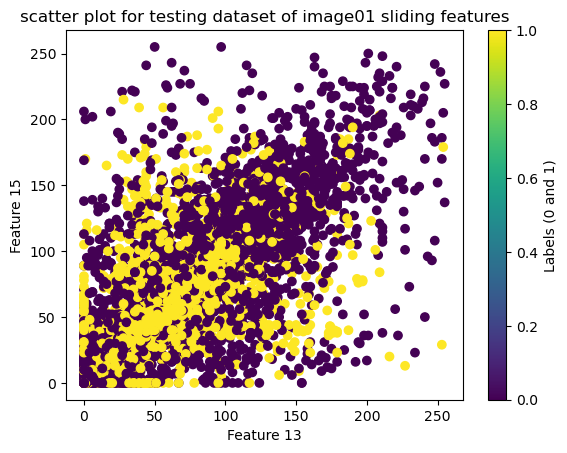

In [18]:
plt.scatter(testSliding01['13'], testSliding01['15'], c= testSliding01['label'])
colorbar = plt.colorbar()
colorbar.set_label('Labels (0 and 1)')
plt.xlabel('Feature 13')
plt.ylabel('Feature 15')
plt.title('scatter plot for testing dataset of image01 sliding features')
plt.show()

In [19]:
# generating image02 data set for Cardinal and Sparrow.

image02 = pd.concat([cardinalFeatureV, sparrowFeatureV], ignore_index=True)
image02.to_csv('C:/Users/venka/OneDrive/Desktop/Big Data/CSV files/image02.csv')

In [20]:
slidingImage02 = pd.concat([cardinalSlidingFeatureV, sparrowSlidingFeatureV], ignore_index=True)
slidingImage02.to_csv('C:/Users/venka/OneDrive/Desktop/Big Data/CSV files/slidingImage02.csv')

In [21]:
# splittiing the data for training and testing.

train02, test02 = train_test_split(image02, test_size=0.2, random_state=100)
train02.to_csv('C:/Users/venka/OneDrive/Desktop/Big Data/CSV files/train02.csv', index=False)
test02.to_csv('C:/Users/venka/OneDrive/Desktop/Big Data/CSV files/test02.csv', index=False)

In [22]:
trainSliding02, testSliding02 = train_test_split(slidingImage02, test_size=0.2, random_state=1000)
trainSliding02.to_csv('C:/Users/venka/OneDrive/Desktop/Big Data/CSV files/trainSliding02.csv', index = False)
testSliding02.to_csv('C:/Users/venka/OneDrive/Desktop/Big Data/CSV files/testSliding02.csv', index = False)

In [23]:
# feature selection for image02 for both block and sliding feature vectors.

feature02 = featureSelection(cardinalFeatureV, sparrowFeatureV)
feature02

112     0.002004
149     0.016634
121     0.017271
12      0.061065
34      0.090802
         ...    
222     9.111229
20      9.372054
248     9.616731
186    10.268003
183    10.616446
Length: 256, dtype: float64

In [24]:
featureSliding02 = featureSelection(cardinalSlidingFeatureV, sparrowSlidingFeatureV)
featureSliding02

0      1.510048
1      1.518609
2      1.528373
16     1.529047
3      1.537531
         ...   
171    1.733521
175    1.733633
174    1.734078
172    1.734078
173    1.734078
Length: 256, dtype: float64

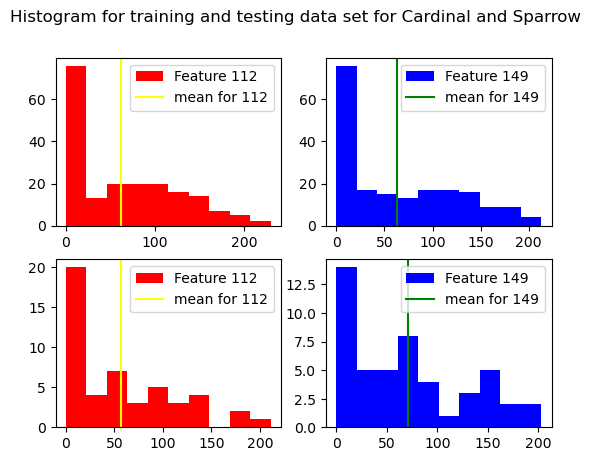

In [25]:
# Plotting histogram for train02 and test02 for block features for feature numbers 112 and 149.

fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2,2)
ax1.hist(train02['112'], color='red', label='Feature 112')
ax2.hist(train02['149'], color='blue', label='Feature 149')
ax1.axvline(train02['112'].mean(), color='yellow', label='mean for 112')
ax2.axvline(train02['149'].mean(), color='green', label='mean for 149')
ax3.hist(test02['112'], color='red', label='Feature 112')
ax4.hist(test02['149'], color='blue', label='Feature 149')
ax3.axvline(test02['112'].mean(), color='yellow', label='mean for 112')
ax4.axvline(test02['149'].mean(), color='green', label='mean for 149')
plt.suptitle('Histogram for training and testing data set for Cardinal and Sparrow')

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()

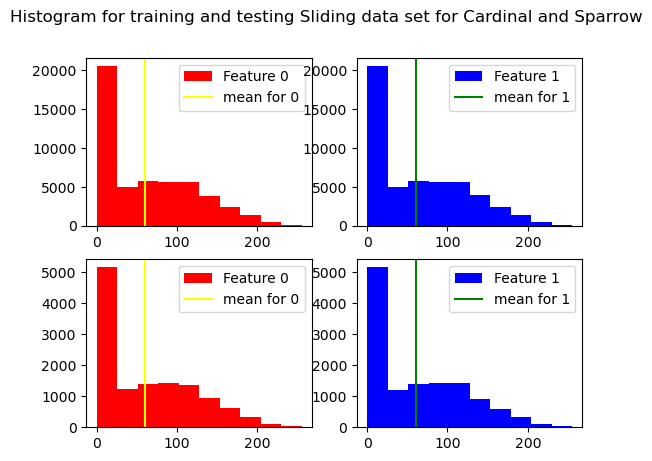

In [26]:
# Plotting histogram for train02 and test02 for sliding features for feature numbers 0 and 1.

fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2,2)
ax1.hist(trainSliding02['0'], color='red', label='Feature 0')
ax2.hist(trainSliding02['1'], color='blue', label='Feature 1')
ax1.axvline(trainSliding02['0'].mean(), color='yellow', label='mean for 0')
ax2.axvline(trainSliding02['1'].mean(), color='green', label='mean for 1')
ax3.hist(testSliding02['0'], color='red', label='Feature 0')
ax4.hist(testSliding02['1'], color='blue', label='Feature 1')
ax3.axvline(testSliding02['0'].mean(), color='yellow', label='mean for 0')
ax4.axvline(testSliding02['1'].mean(), color='green', label='mean for 1')
plt.suptitle('Histogram for training and testing Sliding data set for Cardinal and Sparrow')

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()

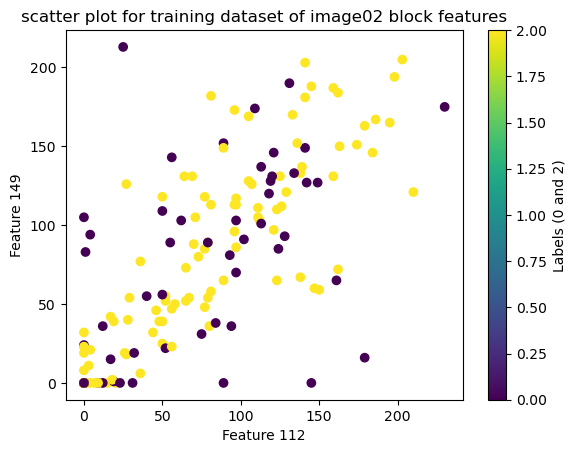

In [27]:
# plotting scatter plot for features.

plt.scatter(train02['112'], train02['149'], c= train02['label'])
colorbar = plt.colorbar()
colorbar.set_label('Labels (0 and 2)')
plt.xlabel('Feature 112')
plt.ylabel('Feature 149')
plt.title('scatter plot for training dataset of image02 block features')
plt.show()

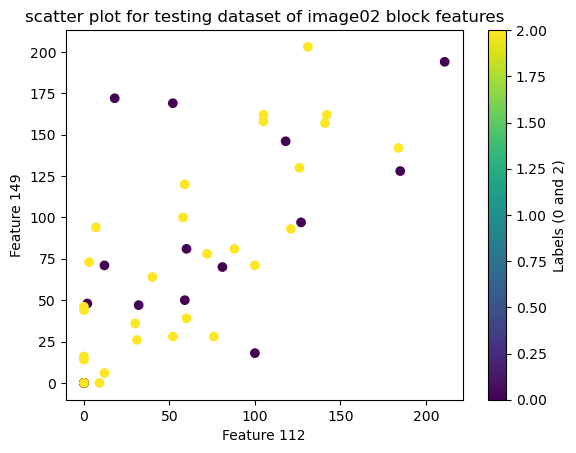

In [28]:
plt.scatter(test02['112'], test02['149'], c= test02['label'])
colorbar = plt.colorbar()
colorbar.set_label('Labels (0 and 2)')
plt.xlabel('Feature 112')
plt.ylabel('Feature 149')
plt.title('scatter plot for testing dataset of image02 block features')
plt.show()

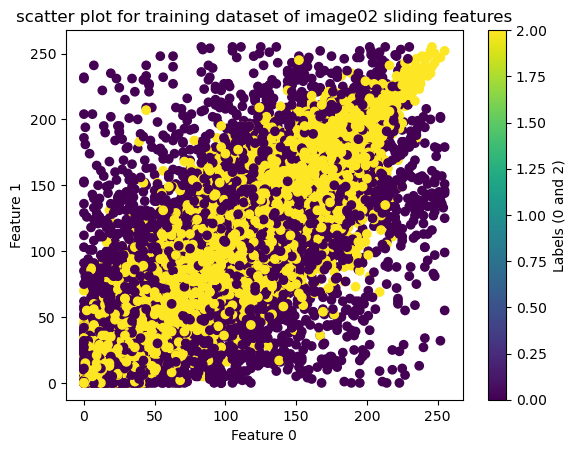

In [29]:
plt.scatter(trainSliding02['0'], trainSliding02['1'], c= trainSliding02['label'])
colorbar = plt.colorbar()
colorbar.set_label('Labels (0 and 2)')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.title('scatter plot for training dataset of image02 sliding features')
plt.show()

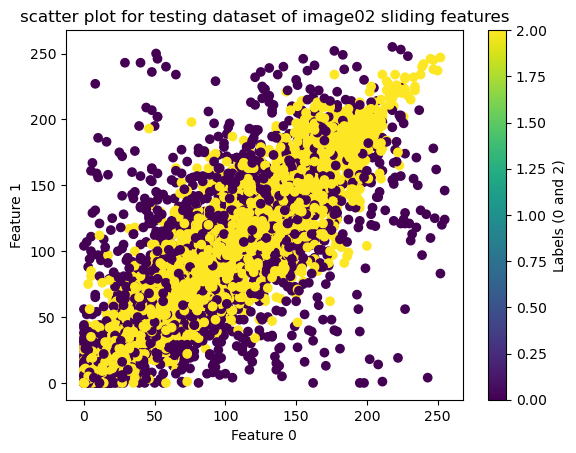

In [30]:
plt.scatter(testSliding02['0'], testSliding02['1'], c= testSliding02['label'])
colorbar = plt.colorbar()
colorbar.set_label('Labels (0 and 2)')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.title('scatter plot for testing dataset of image02 sliding features')
plt.show()

In [31]:
# Generating image12 data with Crested Auklet and sparrow feature vectors.

image12 = pd.concat([crestedFeatureV, sparrowFeatureV], ignore_index=True)
image12.to_csv('C:/Users/venka/OneDrive/Desktop/Big Data/CSV files/image12.csv')

In [32]:
slidingImage12 = pd.concat([crestedSlidingFeatureV, sparrowSlidingFeatureV], ignore_index=True)
slidingImage12.to_csv('C:/Users/venka/OneDrive/Desktop/Big Data/CSV files/slidingImage12.csv')

In [33]:
# splittiing the data for training and testing.

train12, test12 = train_test_split(image12, test_size=0.2, random_state=100)
train12.to_csv('C:/Users/venka/OneDrive/Desktop/Big Data/CSV files/train12.csv', index=False)
test12.to_csv('C:/Users/venka/OneDrive/Desktop/Big Data/CSV files/test12.csv', index=False)

In [34]:
trainSliding12, testSliding12 = train_test_split(slidingImage12, test_size=0.2, random_state=1000)
trainSliding12.to_csv('C:/Users/venka/OneDrive/Desktop/Big Data/CSV files/trainSliding12.csv', index = False)
testSliding12.to_csv('C:/Users/venka/OneDrive/Desktop/Big Data/CSV files/testSliding12.csv', index = False)

In [35]:
# feature selection for image02 for both block and sliding feature vectors.

feature12 = featureSelection(crestedFeatureV, sparrowFeatureV)
feature12

61      9.498448
60     10.956578
79     11.697072
101    12.794416
62     13.030436
         ...    
241    26.922274
134    26.989666
227    27.516058
129    27.711771
145    28.174169
Length: 256, dtype: float64

In [36]:
featureSliding12 = featureSelection(crestedSlidingFeatureV, sparrowSlidingFeatureV)
featureSliding12

13     19.785737
14     19.785737
12     19.785737
15     19.786182
11     19.786293
         ...    
244    20.119459
243    20.126940
242    20.136098
241    20.145975
240    20.157206
Length: 256, dtype: float64

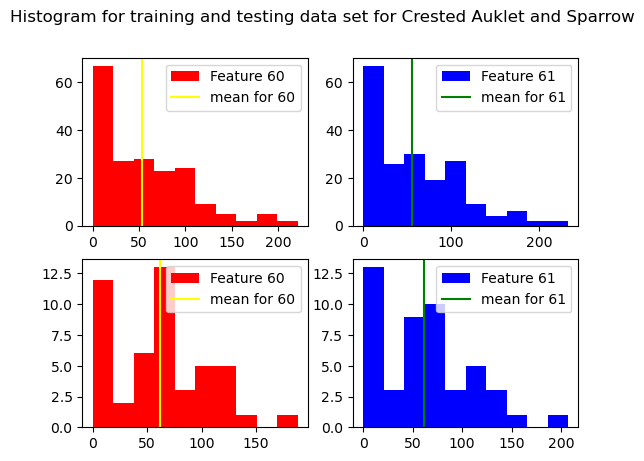

In [37]:
# Plotting histogram for train12 and test12 for block features for feature numbers 60 and 61.

fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2,2)
ax1.hist(train12['60'], color='red', label='Feature 60')
ax2.hist(train12['61'], color='blue', label='Feature 61')
ax1.axvline(train12['60'].mean(), color='yellow', label='mean for 60')
ax2.axvline(train12['61'].mean(), color='green', label='mean for 61')
ax3.hist(test12['60'], color='red', label='Feature 60')
ax4.hist(test12['61'], color='blue', label='Feature 61')
ax3.axvline(test12['60'].mean(), color='yellow', label='mean for 60')
ax4.axvline(test12['61'].mean(), color='green', label='mean for 61')
plt.suptitle('Histogram for training and testing data set for Crested Auklet and Sparrow')

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()

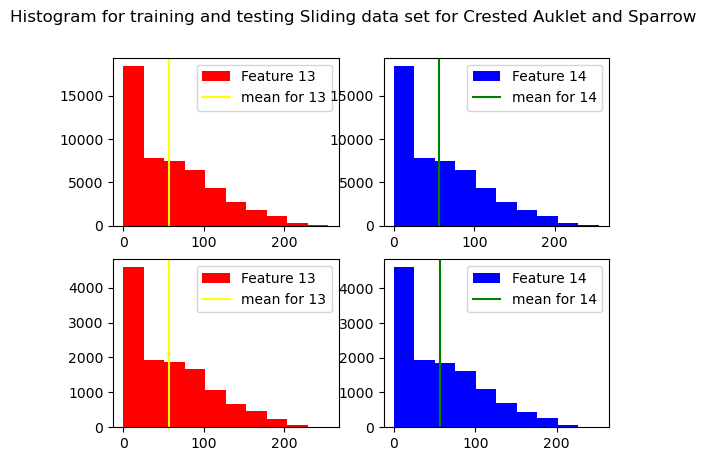

In [38]:
# Plotting histogram for train12 and test12 for sliding features for feature numbers 13 and 14.

fig, ((ax1, ax2), (ax3,ax4)) = plt.subplots(2,2)
ax1.hist(trainSliding12['13'], color='red', label='Feature 13')
ax2.hist(trainSliding12['14'], color='blue', label='Feature 14')
ax1.axvline(trainSliding12['13'].mean(), color='yellow', label='mean for 13')
ax2.axvline(trainSliding12['14'].mean(), color='green', label='mean for 14')
ax3.hist(testSliding12['13'], color='red', label='Feature 13')
ax4.hist(testSliding12['14'], color='blue', label='Feature 14')
ax3.axvline(testSliding12['13'].mean(), color='yellow', label='mean for 13')
ax4.axvline(testSliding12['14'].mean(), color='green', label='mean for 14')
plt.suptitle('Histogram for training and testing Sliding data set for Crested Auklet and Sparrow')

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()

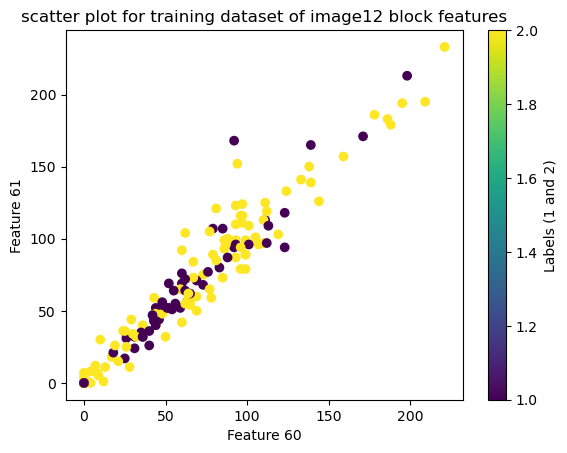

In [39]:
# plotting scatter plot for features.

plt.scatter(train12['60'], train12['61'], c= train12['label'])
colorbar = plt.colorbar()
colorbar.set_label('Labels (1 and 2)')
plt.xlabel('Feature 60')
plt.ylabel('Feature 61')
plt.title('scatter plot for training dataset of image12 block features')
plt.show()

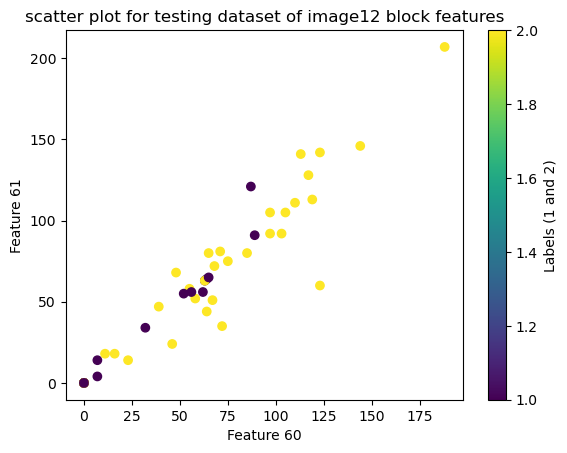

In [40]:
plt.scatter(test12['60'], test12['61'], c= test12['label'])
colorbar = plt.colorbar()
colorbar.set_label('Labels (1 and 2)')
plt.xlabel('Feature 60')
plt.ylabel('Feature 61')
plt.title('scatter plot for testing dataset of image12 block features')
plt.show()

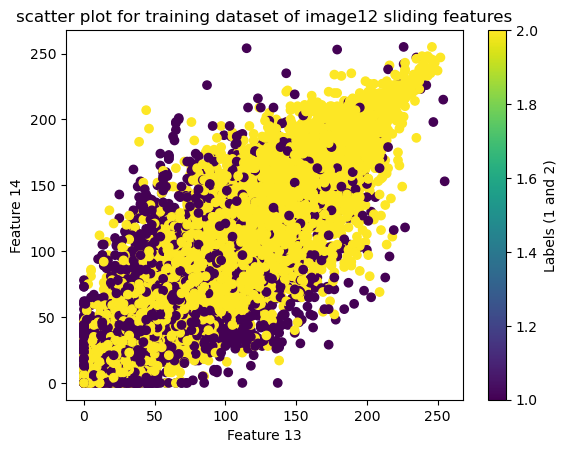

In [41]:
plt.scatter(trainSliding12['13'], trainSliding12['14'], c= trainSliding12['label'])
colorbar = plt.colorbar()
colorbar.set_label('Labels (1 and 2)')
plt.xlabel('Feature 13')
plt.ylabel('Feature 14')
plt.title('scatter plot for training dataset of image12 sliding features')
plt.show()

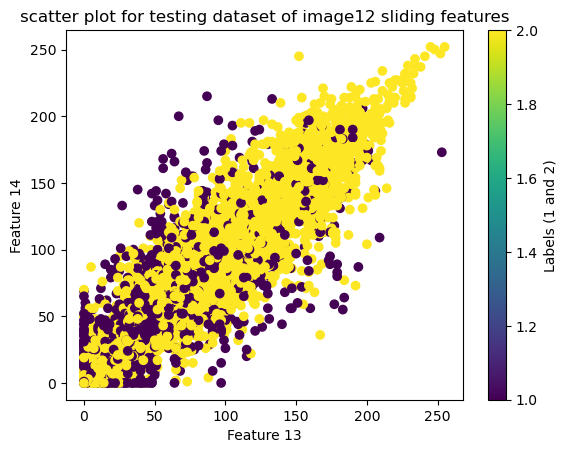

In [42]:
plt.scatter(testSliding12['13'], testSliding12['14'], c= testSliding12['label'])
colorbar = plt.colorbar()
colorbar.set_label('Labels (1 and 2)')
plt.xlabel('Feature 13')
plt.ylabel('Feature 14')
plt.title('scatter plot for testing dataset of image12 sliding features')
plt.show()

# Implemeting regression based models.

In [43]:
# Implementing regression based models on image01 data set.

train_01 = train01.copy()
test_01 = test01.copy()

In [44]:
y_01_train = train_01['label']
y_01_test = test_01['label']

In [45]:
train_01.drop('label', axis=1, inplace=True)
test_01.drop('label', axis=1, inplace=True)

In [46]:
ric01 = RidgeClassifier(alpha=0.01)
ric01.fit(train_01, y_01_train)

RidgeClassifier(alpha=0.01)

In [47]:
y_01_predict = ric01.predict(test_01)

In [48]:
# confusion matrix

cm01 = confusion_matrix(y_01_test, y_01_predict)

In [49]:
cm01

array([[11,  5],
       [ 7, 13]], dtype=int64)

In [50]:
TN01 = cm01[1,1]
FP01 = cm01[1,0]
FN01 = cm01[0,1]
TP01 = cm01[0,0]
FPFN01 = FP01+FN01
TPTN01 = TP01+TN01
Accuracy01 = 1/(1+(FPFN01/TPTN01))
print("Our_Accuracy01_Score:",Accuracy01)
Precision01 = 1/(1+(FP01/TP01))
print("Our_Precision01_Score:",Precision01)
Sensitivity01 = 1/(1+(FN01/TP01))
print("Our_Sensitivity01_Score:",Sensitivity01)
Specificity01 = 1/(1+(FP01/TN01))
print("Our_Specificity01_Score:",Specificity01)

Our_Accuracy01_Score: 0.6666666666666666
Our_Precision01_Score: 0.6111111111111112
Our_Sensitivity01_Score: 0.6875
Our_Specificity01_Score: 0.65


In [51]:
# Built in  measures.

print("BuiltIn Acuracy01: ",metrics.accuracy_score(y_01_test, y_01_predict))
print("BuiltIn Precision01: ",metrics.precision_score(y_01_test, y_01_predict))
print("BuiltIn Sensitivity01: ",metrics.recall_score(y_01_test, y_01_predict, pos_label=0))
print("BuiltIn Specificity01: ",metrics.recall_score(y_01_test, y_01_predict, pos_label=1))

BuiltIn Acuracy01:  0.6666666666666666
BuiltIn Precision01:  0.7222222222222222
BuiltIn Sensitivity01:  0.6875
BuiltIn Specificity01:  0.65


In [52]:
# for sliding imag01 regression model.

trainSliding_01 = trainSliding01.copy()
testSliding_01 = testSliding01.copy()

In [53]:
ySliding_01_train = trainSliding_01['label']
ySliding_01_test = testSliding_01['label']

In [54]:
trainSliding_01.drop('label', axis=1, inplace=True)
testSliding_01.drop('label', axis=1, inplace=True)

In [55]:
ricSliding01 = RidgeClassifier(alpha=0.01)
ricSliding01.fit(trainSliding_01, ySliding_01_train)

RidgeClassifier(alpha=0.01)

In [56]:
ySliding_01_predict = ricSliding01.predict(testSliding_01)

In [57]:
cmSliding01 = confusion_matrix(ySliding_01_test, ySliding_01_predict)

In [58]:
cmSliding01

array([[2485, 2241],
       [1750, 2865]], dtype=int64)

In [59]:
TNS01 = cmSliding01[1,1]
FPS01 = cmSliding01[1,0]
FNS01 = cmSliding01[0,1]
TPS01 = cmSliding01[0,0]
FPFNS01 = FPS01+FNS01
TPTNS01 = TPS01+TNS01
AccuracyS01 = 1/(1+(FPFNS01/TPTNS01))
print("Our_AccuracyS01_Score:",AccuracyS01)
PrecisionS01 = 1/(1+(FPS01/TPS01))
print("Our_PrecisionS01_Score:",PrecisionS01)
SensitivityS01 = 1/(1+(FNS01/TPS01))
print("Our_SensitivityS01_Score:",SensitivityS01)
SpecificityS01 = 1/(1+(FPS01/TNS01))
print("Our_SpecificityS01_Score:",SpecificityS01)

Our_AccuracyS01_Score: 0.5727438175784177
Our_PrecisionS01_Score: 0.5867768595041323
Our_SensitivityS01_Score: 0.5258146424037241
Our_SpecificityS01_Score: 0.6208017334777899


In [60]:
# Built in  measures.

print("BuiltIn AcuracyS01: ",metrics.accuracy_score(ySliding_01_test, ySliding_01_predict))
print("BuiltIn PrecisionS01: ",metrics.precision_score(ySliding_01_test, ySliding_01_predict))
print("BuiltIn SensitivityS01: ",metrics.recall_score(ySliding_01_test, ySliding_01_predict, pos_label=0))
print("BuiltIn SpecificityS01: ",metrics.recall_score(ySliding_01_test, ySliding_01_predict, pos_label=1))

BuiltIn AcuracyS01:  0.5727438175784177
BuiltIn PrecisionS01:  0.5611045828437132
BuiltIn SensitivityS01:  0.5258146424037241
BuiltIn SpecificityS01:  0.6208017334777898


In [61]:
# Regression models for image02 (Cardinal and Sparrow)

train_02 = train02.copy()
test_02 = test02.copy()

In [62]:
y_02_train = train_02['label']
y_02_test = test_02['label']

In [63]:
train_02.drop('label', axis=1, inplace=True)
test_02.drop('label', axis=1, inplace=True)

In [64]:
ric02 = RidgeClassifier(alpha=0.01)
ric02.fit(train_02, y_02_train)

RidgeClassifier(alpha=0.01)

In [65]:
y_02_predict = ric02.predict(test_02)

In [66]:
# confusion matrix

cm02 = confusion_matrix(y_02_test, y_02_predict)

In [67]:
cm02

array([[ 7, 10],
       [20, 12]], dtype=int64)

In [68]:
TN02 = cm02[1,1]
FP02 = cm02[1,0]
FN02 = cm02[0,1]
TP02 = cm02[0,0]
FPFN02 = FP02+FN02
TPTN02 = TP02+TN02
Accuracy02 = 1/(1+(FPFN02/TPTN02))
print("Our_Accuracy02_Score:",Accuracy02)
Precision02 = 1/(1+(FP02/TP02))
print("Our_Precision02_Score:",Precision02)
Sensitivity02 = 1/(1+(FN02/TP02))
print("Our_Sensitivity02_Score:",Sensitivity02)
Specificity02 = 1/(1+(FP02/TN02))
print("Our_Specificity02_Score:",Specificity02)

Our_Accuracy02_Score: 0.3877551020408163
Our_Precision02_Score: 0.25925925925925924
Our_Sensitivity02_Score: 0.4117647058823529
Our_Specificity02_Score: 0.37499999999999994


In [69]:
# Built in  measures.

print("BuiltIn Acuracy02: ",metrics.accuracy_score(y_02_test, y_02_predict))
print("BuiltIn Precision02: ",metrics.precision_score(y_02_test, y_02_predict, pos_label=0))
print("BuiltIn Sensitivity02: ",metrics.recall_score(y_02_test, y_02_predict, pos_label=0))
print("BuiltIn Specificity02: ",metrics.recall_score(y_02_test, y_02_predict, pos_label=2))

BuiltIn Acuracy02:  0.3877551020408163
BuiltIn Precision02:  0.25925925925925924
BuiltIn Sensitivity02:  0.4117647058823529
BuiltIn Specificity02:  0.375


In [70]:
# for sliding imag02 regression model.

trainSliding_02 = trainSliding02.copy()
testSliding_02 = testSliding02.copy()

In [71]:
ySliding_02_train = trainSliding_02['label']
ySliding_02_test = testSliding_02['label']

In [72]:
trainSliding_02.drop('label', axis=1, inplace=True)
testSliding_02.drop('label', axis=1, inplace=True)

In [73]:
ricSliding02 = RidgeClassifier(alpha=0.01)
ricSliding02.fit(trainSliding_02, ySliding_02_train)

RidgeClassifier(alpha=0.01)

In [74]:
ySliding_02_predict = ricSliding02.predict(testSliding_02)

In [75]:
cmSliding02 = confusion_matrix(ySliding_02_test, ySliding_02_predict)

In [76]:
cmSliding02

array([[   1, 4732],
       [   0, 7906]], dtype=int64)

In [77]:
TNS02 = cmSliding02[1,1]
FPS02 = cmSliding02[1,0]
FNS02 = cmSliding02[0,1]
TPS02 = cmSliding02[0,0]
FPFNS02 = FPS02+FNS02
TPTNS02 = TPS02+TNS02
AccuracyS02 = 1/(1+(FPFNS02/TPTNS02))
print("Our_AccuracyS02_Score:",AccuracyS02)
PrecisionS02 = 1/(1+(FPS02/TPS02))
print("Our_PrecisionS02_Score:",PrecisionS02)
SensitivityS02 = 1/(1+(FNS02/TPS02))
print("Our_SensitivityS02_Score:",SensitivityS02)
SpecificityS02 = 1/(1+(FPS02/TNS02))
print("Our_SpecificityS01_Score:",SpecificityS02)

Our_AccuracyS02_Score: 0.625603291399636
Our_PrecisionS02_Score: 1.0
Our_SensitivityS02_Score: 0.00021128248468201986
Our_SpecificityS01_Score: 1.0


In [78]:
# Built in  measures.

print("BuiltIn AcuracyS02: ",metrics.accuracy_score(ySliding_02_test, ySliding_02_predict))
print("BuiltIn PrecisionS02: ",metrics.precision_score(ySliding_02_test, ySliding_02_predict, pos_label=0))
print("BuiltIn SensitivityS02: ",metrics.recall_score(ySliding_02_test, ySliding_02_predict, pos_label=0))
print("BuiltIn SpecificityS02: ",metrics.recall_score(ySliding_02_test, ySliding_02_predict, pos_label=2))

BuiltIn AcuracyS02:  0.625603291399636
BuiltIn PrecisionS02:  1.0
BuiltIn SensitivityS02:  0.00021128248468201986
BuiltIn SpecificityS02:  1.0


In [79]:
# Regression models for image12 (Crested Auklet and Sparrow)

train_12 = train12.copy()
test_12 = test12.copy()

In [80]:
y_12_train = train_12['label']
y_12_test = test_12['label']

In [81]:
train_12.drop('label', axis=1, inplace=True)
test_12.drop('label', axis=1, inplace=True)

In [82]:
ric12 = RidgeClassifier(alpha=0.01)
ric12.fit(train_12, y_12_train)

RidgeClassifier(alpha=0.01)

In [83]:
y_12_predict = ric12.predict(test_12)

In [84]:
# confusion matrix

cm12 = confusion_matrix(y_12_test, y_12_predict)

In [85]:
cm12

array([[ 6, 10],
       [16, 16]], dtype=int64)

In [86]:
TN12 = cm12[1,1]
FP12 = cm12[1,0]
FN12 = cm12[0,1]
TP12 = cm12[0,0]
FPFN12 = FP12+FN12
TPTN12 = TP12+TN12
Accuracy12 = 1/(1+(FPFN12/TPTN12))
print("Our_Accuracy12_Score:",Accuracy12)
Precision12 = 1/(1+(FP12/TP12))
print("Our_Precision12_Score:",Precision12)
Sensitivity12 = 1/(1+(FN12/TP12))
print("Our_Sensitivity12_Score:",Sensitivity12)
Specificity12 = 1/(1+(FP12/TN12))
print("Our_Specificity12_Score:",Specificity12)

Our_Accuracy12_Score: 0.45833333333333337
Our_Precision12_Score: 0.27272727272727276
Our_Sensitivity12_Score: 0.37499999999999994
Our_Specificity12_Score: 0.5


In [87]:
# Built in  measures.

print("BuiltIn Acuracy12: ",metrics.accuracy_score(y_12_test, y_12_predict))
print("BuiltIn Precision12: ",metrics.precision_score(y_12_test, y_12_predict, pos_label=1))
print("BuiltIn Sensitivity12: ",metrics.recall_score(y_12_test, y_12_predict, pos_label=1))
print("BuiltIn Specificity12: ",metrics.recall_score(y_12_test, y_12_predict, pos_label=2))

BuiltIn Acuracy12:  0.4583333333333333
BuiltIn Precision12:  0.2727272727272727
BuiltIn Sensitivity12:  0.375
BuiltIn Specificity12:  0.5


In [88]:
# for sliding imag12 regression model.

trainSliding_12 = trainSliding12.copy()
testSliding_12 = testSliding12.copy()

In [89]:
ySliding_12_train = trainSliding_12['label']
ySliding_12_test = testSliding_12['label']

In [90]:
trainSliding_12.drop('label', axis=1, inplace=True)
testSliding_12.drop('label', axis=1, inplace=True)

In [91]:
ricSliding12 = RidgeClassifier(alpha=0.01)
ricSliding12.fit(trainSliding_12, ySliding_12_train)

RidgeClassifier(alpha=0.01)

In [92]:
ySliding_12_predict = ricSliding12.predict(testSliding_12)

In [93]:
cmSliding12 = confusion_matrix(ySliding_12_test, ySliding_12_predict)

In [94]:
cmSliding12

array([[ 727, 3934],
       [1608, 6312]], dtype=int64)

In [95]:
TNS12 = cmSliding12[1,1]
FPS12 = cmSliding12[1,0]
FNS12 = cmSliding12[0,1]
TPS12 = cmSliding12[0,0]
FPFNS12 = FPS12+FNS12
TPTNS12 = TPS12+TNS12
AccuracyS12 = 1/(1+(FPFNS12/TPTNS12))
print("Our_AccuracyS12_Score:",AccuracyS12)
PrecisionS12 = 1/(1+(FPS12/TPS12))
print("Our_PrecisionS12_Score:",PrecisionS12)
SensitivityS12 = 1/(1+(FNS12/TPS12))
print("Our_SensitivityS12_Score:",SensitivityS12)
SpecificityS12 = 1/(1+(FPS12/TNS12))
print("Our_SpecificityS12_Score:",SpecificityS12)

Our_AccuracyS12_Score: 0.5594944757968365
Our_PrecisionS12_Score: 0.3113490364025696
Our_SensitivityS12_Score: 0.15597511263677322
Our_SpecificityS12_Score: 0.7969696969696969


In [96]:
# Built in  measures.

print("BuiltIn AcuracyS12: ",metrics.accuracy_score(ySliding_12_test, ySliding_12_predict))
print("BuiltIn PrecisionS12: ",metrics.precision_score(ySliding_12_test, ySliding_12_predict, pos_label=1))
print("BuiltIn SensitivityS12: ",metrics.recall_score(ySliding_12_test, ySliding_12_predict, pos_label=1))
print("BuiltIn SpecificityS12: ",metrics.recall_score(ySliding_12_test, ySliding_12_predict, pos_label=2))

BuiltIn AcuracyS12:  0.5594944757968365
BuiltIn PrecisionS12:  0.3113490364025696
BuiltIn SensitivityS12:  0.15597511263677322
BuiltIn SpecificityS12:  0.796969696969697


# Deep Learning

In [97]:
# generating image012 data set.

image012 = pd.concat([cardinalFeatureV,crestedFeatureV, sparrowFeatureV], ignore_index=True)
image012.to_csv('C:/Users/venka/OneDrive/Desktop/Big Data/CSV files/image012.csv')

In [98]:
slidingImage012 = pd.concat([cardinalSlidingFeatureV, crestedSlidingFeatureV, sparrowSlidingFeatureV], ignore_index=True)
slidingImage012.to_csv('C:/Users/venka/OneDrive/Desktop/Big Data/CSV files/slidingImage012.csv')

In [99]:
# splittiing the data for training and testing.

train012, test012 = train_test_split(image012, test_size=0.2, random_state=300)
train012.to_csv('C:/Users/venka/OneDrive/Desktop/Big Data/CSV files/train012.csv', index=False)
test012.to_csv('C:/Users/venka/OneDrive/Desktop/Big Data/CSV files/test012.csv', index=False)

In [100]:
trainSliding012, testSliding012 = train_test_split(slidingImage012, test_size=0.2, random_state=1000)
trainSliding012.to_csv('C:/Users/venka/OneDrive/Desktop/Big Data/CSV files/trainSliding012.csv', index = False)
testSliding012.to_csv('C:/Users/venka/OneDrive/Desktop/Big Data/CSV files/testSliding012.csv', index = False)

In [101]:
train_012 = train012.copy()
test_012 = test012.copy()

In [102]:
y_012_train = train_012['label']
y_012_test = test_012['label']

In [103]:
train_012.drop('label', axis=1, inplace=True)
test_012.drop('label', axis=1, inplace=True)


In [104]:
y_012_train

198    2
136    1
205    2
167    1
137    1
      ..
91     1
213    2
9      0
202    2
209    2
Name: label, Length: 263, dtype: int64

In [105]:
y_012_train_encoded = to_categorical(y_012_train, num_classes=3)
y_012_train_encoded

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1

In [106]:
# Deep learning model for three class classifier.

model012 = Sequential()
model012.add(Dense(units=128, activation='relu', input_dim=train_012.shape[1]))
model012.add(Dense(units=64, activation='relu'))
model012.add(Dense(units=3, activation='softmax'))

model012.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model012.fit(train_012, y_012_train_encoded, epochs=10, batch_size=32)

Epoch 1/10
9/9 [==============================] - 2s 5ms/step - loss: 23.2826 - accuracy: 0.3156
Epoch 2/10
9/9 [==============================] - 0s 5ms/step - loss: 10.6407 - accuracy: 0.4563
Epoch 3/10
9/9 [==============================] - 0s 4ms/step - loss: 5.8914 - accuracy: 0.5247
Epoch 4/10
9/9 [==============================] - 0s 4ms/step - loss: 4.2788 - accuracy: 0.5856
Epoch 5/10
9/9 [==============================] - 0s 4ms/step - loss: 5.5379 - accuracy: 0.5856
Epoch 6/10
9/9 [==============================] - 0s 5ms/step - loss: 2.9212 - accuracy: 0.7034
Epoch 7/10
9/9 [==============================] - 0s 4ms/step - loss: 3.0831 - accuracy: 0.7224
Epoch 8/10
9/9 [==============================] - 0s 4ms/step - loss: 2.2774 - accuracy: 0.7452
Epoch 9/10
9/9 [==============================] - 0s 5ms/step - loss: 2.2088 - accuracy: 0.7529
Epoch 10/10
9/9 [==============================] - 0s 6ms/step - loss: 0.9578 - accuracy: 0.8061


In [107]:
y_012_predict = model012.predict(test_012)
y_012_predict = np.argmax(y_012_predict, axis=1)
y_012_test.shape

3/3 [==============================] - 0s 4ms/step


(66,)

In [108]:
cm012 = confusion_matrix(y_012_test, y_012_predict)
cm012

array([[ 8,  4,  7],
       [ 1,  7,  5],
       [ 4, 10, 20]], dtype=int64)

In [109]:
# Matrix for individual classes.
cm012_0 = np.matrix([[5,14],[5,47]])
cm012_1 = np.matrix([[7,6],[24,29]])
cm012_2 = np.matrix([[15,19],[10,22]])

# Measures for 0 class.

TND012_0 = cm012_0[1,1]
FPD012_0 = cm012_0[1,0]
FND012_0 = cm012_0[0,1]
TPD012_0 = cm012_0[0,0]
FPFND012_0 = FPD012_0+FND012_0
TPTND012_0 = TPD012_0+TND012_0
AccuracyD012_0 = 1/(1+(FPFND012_0/TPTND012_0))
print("Our_AccuracyD012_0_Score:",AccuracyD012_0)
PrecisionD012_0 = 1/(1+(FPD012_0/TPD012_0))
print("Our_PrecisionD012_0_Score:",PrecisionD012_0)
SensitivityD012_0 = 1/(1+(FND012_0/TPD012_0))
print("Our_SensitivityD012_0_Score:",SensitivityD012_0)
SpecificityD012_0 = 1/(1+(FPD012_0/TND012_0))
print("Our_SpecificityD012_0_Score:",SpecificityD012_0)

# Measures for 1 class.
print()
TND012_1 = cm012_1[1,1]
FPD012_1 = cm012_1[1,0]
FND012_1 = cm012_1[0,1]
TPD012_1 = cm012_1[0,0]
FPFND012_1 = FPD012_1+FND012_1
TPTND012_1 = TPD012_1+TND012_1
AccuracyD012_1 = 1/(1+(FPFND012_1/TPTND012_1))
print("Our_AccuracyD012_1_Score:",AccuracyD012_1)
PrecisionD012_1 = 1/(1+(FPD012_1/TPD012_1))
print("Our_PrecisionD012_1_Score:",PrecisionD012_1)
SensitivityD012_1 = 1/(1+(FND012_1/TPD012_1))
print("Our_SensitivityD012_1_Score:",SensitivityD012_1)
SpecificityD012_1 = 1/(1+(FPD012_1/TND012_1))
print("Our_SpecificityD012_1_Score:",SpecificityD012_1)

# Measures for 2 class.
print()
TND012_2 = cm012_2[1,1]
FPD012_2 = cm012_2[1,0]
FND012_2 = cm012_2[0,1]
TPD012_2 = cm012_2[0,0]
FPFND012_2 = FPD012_2+FND012_2
TPTND012_2 = TPD012_2+TND012_2
AccuracyD012_2 = 1/(1+(FPFND012_2/TPTND012_2))
print("Our_AccuracyD012_2_Score:",AccuracyD012_2)
PrecisionD012_2 = 1/(1+(FPD012_2/TPD012_2))
print("Our_PrecisionD012_2_Score:",PrecisionD012_2)
SensitivityD012_2 = 1/(1+(FND012_2/TPD012_2))
print("Our_SensitivityD012_2_Score:",SensitivityD012_2)
SpecificityD012_2 = 1/(1+(FPD012_2/TND012_2))
print("Our_SpecificityD012_2_Score:",SpecificityD012_2)

Our_AccuracyD012_0_Score: 0.7323943661971831
Our_PrecisionD012_0_Score: 0.5
Our_SensitivityD012_0_Score: 0.2631578947368421
Our_SpecificityD012_0_Score: 0.9038461538461539

Our_AccuracyD012_1_Score: 0.5454545454545454
Our_PrecisionD012_1_Score: 0.22580645161290322
Our_SensitivityD012_1_Score: 0.5384615384615384
Our_SpecificityD012_1_Score: 0.5471698113207547

Our_AccuracyD012_2_Score: 0.5606060606060607
Our_PrecisionD012_2_Score: 0.6000000000000001
Our_SensitivityD012_2_Score: 0.4411764705882353
Our_SpecificityD012_2_Score: 0.6875


In [110]:
# Built-in measures.

print("BuiltIn AcuracyD012: ",metrics.accuracy_score(y_012_test, y_012_predict))
print("BuiltIn PrecisionD012: ",metrics.precision_score(y_012_test, y_012_predict, average=None))
print("BuiltIn SensitivityD012: ",metrics.recall_score(y_012_test, y_012_predict, average=None))

BuiltIn AcuracyD012:  0.5303030303030303
BuiltIn PrecisionD012:  [0.61538462 0.33333333 0.625     ]
BuiltIn SensitivityD012:  [0.42105263 0.53846154 0.58823529]


In [111]:
# Model for Overlapping data points.

trainSliding_012 = trainSliding012.copy()
testSliding_012 = testSliding012.copy()

In [112]:
ySliding_012_train = trainSliding_012['label']
ySliding_012_test = testSliding_012['label']

In [113]:
trainSliding_012.drop('label', axis=1, inplace=True)
testSliding_012.drop('label', axis=1, inplace=True)

In [114]:
ySliding_012_train_encoded = to_categorical(ySliding_012_train, num_classes=3)
ySliding_012_train_encoded.shape

(69118, 3)

In [115]:
# Deep learning model for three class classifier.

modelS012 = Sequential()
modelS012.add(Dense(units=128, activation='relu', input_dim=trainSliding_012.shape[1]))
modelS012.add(Dense(units=64, activation='relu'))
modelS012.add(Dense(units=3, activation='softmax'))

modelS012.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
modelS012.fit(trainSliding_012, ySliding_012_train_encoded, epochs=10, batch_size=32)

Epoch 1/10
2160/2160 [==============================] - 11s 4ms/step - loss: 1.8538 - accuracy: 0.5605
Epoch 2/10
2160/2160 [==============================] - 9s 4ms/step - loss: 0.7915 - accuracy: 0.6525
Epoch 3/10
2160/2160 [==============================] - 10s 4ms/step - loss: 0.7254 - accuracy: 0.6875
Epoch 4/10
2160/2160 [==============================] - 9s 4ms/step - loss: 0.6551 - accuracy: 0.7216
Epoch 5/10
2160/2160 [==============================] - 10s 4ms/step - loss: 0.5930 - accuracy: 0.7537
Epoch 6/10
2160/2160 [==============================] - 9s 4ms/step - loss: 0.5351 - accuracy: 0.7813
Epoch 7/10
2160/2160 [==============================] - 9s 4ms/step - loss: 0.4880 - accuracy: 0.8001
Epoch 8/10
2160/2160 [==============================] - 9s 4ms/step - loss: 0.4464 - accuracy: 0.8188
Epoch 9/10
2160/2160 [==============================] - 9s 4ms/step - loss: 0.4192 - accuracy: 0.8313
Epoch 10/10
2160/2160 [==============================] - 9s 4ms/step - loss: 0.

In [116]:
ySliding_012_predict = modelS012.predict(testSliding_012)
ySliding_012_predict = np.argmax(ySliding_012_predict, axis=1)

540/540 [==============================] - 2s 3ms/step


In [117]:
cmS012 = confusion_matrix(ySliding_012_test, ySliding_012_predict)
cmS012

array([[3075,  388, 1180],
       [ 175, 3942,  471],
       [ 262,  423, 7364]], dtype=int64)

In [118]:
# Matrix for individual classes.
cmS012_0 = np.matrix([[3640,1003],[807,11830]])
cmS012_1 = np.matrix([[3912,676],[1155,11537]])
cmS012_2 = np.matrix([[6741,1308],[1025,8206]])

# Measures for 0 class.

TNDS012_0 = cmS012_0[1,1]
FPDS012_0 = cmS012_0[1,0]
FNDS012_0 = cmS012_0[0,1]
TPDS012_0 = cmS012_0[0,0]
FPFNDS012_0 = FPDS012_0+FNDS012_0
TPTNDS012_0 = TPDS012_0+TNDS012_0
AccuracyDS012_0 = 1/(1+(FPFNDS012_0/TPTNDS012_0))
print("Our_AccuracyDS012_0_Score:",AccuracyDS012_0)
PrecisionDS012_0 = 1/(1+(FPDS012_0/TPDS012_0))
print("Our_PrecisionDS012_0_Score:",PrecisionDS012_0)
SensitivityDS012_0 = 1/(1+(FNDS012_0/TPDS012_0))
print("Our_SensitivityDS012_0_Score:",SensitivityDS012_0)
SpecificityDS012_0 = 1/(1+(FPDS012_0/TNDS012_0))
print("Our_SpecificityDS012_0_Score:",SpecificityDS012_0)

# Measures for 1 class.
print()
TNDS012_1 = cmS012_1[1,1]
FPDS012_1 = cmS012_1[1,0]
FNDS012_1 = cmS012_1[0,1]
TPDS012_1 = cmS012_1[0,0]
FPFNDS012_1 = FPDS012_1+FNDS012_1
TPTNDS012_1 = TPDS012_1+TNDS012_1
AccuracyDS012_1 = 1/(1+(FPFNDS012_1/TPTNDS012_1))
print("Our_AccuracyDS012_1_Score:",AccuracyDS012_1)
PrecisionDS012_1 = 1/(1+(FPDS012_1/TPDS012_1))
print("Our_PrecisionDS012_1_Score:",PrecisionDS012_1)
SensitivityDS012_1 = 1/(1+(FNDS012_1/TPDS012_1))
print("Our_SensitivityDS012_1_Score:",SensitivityDS012_1)
SpecificityDS012_1 = 1/(1+(FPDS012_1/TNDS012_1))
print("Our_SpecificityDS012_1_Score:",SpecificityDS012_1)

# Measures for 2 class.
print()
TNDS012_2 = cmS012_2[1,1]
FPDS012_2 = cmS012_2[1,0]
FNDS012_2 = cmS012_2[0,1]
TPDS012_2 = cmS012_2[0,0]
FPFNDS012_2 = FPDS012_2+FNDS012_2
TPTNDS012_2 = TPDS012_2+TNDS012_2
AccuracyDS012_2 = 1/(1+(FPFNDS012_2/TPTNDS012_2))
print("Our_AccuracyDS012_2_Score:",AccuracyDS012_2)
PrecisionDS012_2 = 1/(1+(FPDS012_2/TPDS012_2))
print("Our_PrecisionDS012_2_Score:",PrecisionDS012_2)
SensitivityDS012_2 = 1/(1+(FNDS012_2/TPDS012_2))
print("Our_SensitivityDS012_2_Score:",SensitivityDS012_2)
SpecificityDS012_2 = 1/(1+(FPDS012_2/TNDS012_2))
print("Our_SpecificityDS012_2_Score:",SpecificityDS012_2)

Our_AccuracyDS012_0_Score: 0.8952546296296297
Our_PrecisionDS012_0_Score: 0.8185293456262648
Our_SensitivityDS012_0_Score: 0.7839758776653026
Our_SpecificityDS012_0_Score: 0.9361399066234075

Our_AccuracyDS012_1_Score: 0.8940393518518519
Our_PrecisionDS012_1_Score: 0.7720544701006513
Our_SensitivityDS012_1_Score: 0.8526591107236269
Our_SpecificityDS012_1_Score: 0.9089977938859125

Our_AccuracyDS012_2_Score: 0.864988425925926
Our_PrecisionDS012_2_Score: 0.8680144218387844
Our_SensitivityDS012_2_Score: 0.8374953410361536
Our_SpecificityDS012_2_Score: 0.8889611093056008


In [119]:
# Built-in measures.

print("BuiltIn AcuracyDS012: ",metrics.accuracy_score(ySliding_012_test, ySliding_012_predict))
print("BuiltIn PrecisionDS012: ",metrics.precision_score(ySliding_012_test, ySliding_012_predict, average=None))
print("BuiltIn SensitivityDS012: ",metrics.recall_score(ySliding_012_test, ySliding_012_predict, average=None))

BuiltIn AcuracyDS012:  0.8322337962962963
BuiltIn PrecisionDS012:  [0.87556948 0.82937092 0.81686079]
BuiltIn SensitivityDS012:  [0.66228731 0.85919791 0.91489626]


In [120]:
# Deep learning for 2 class classifier
# for image01 block features.

y_01_train_encoded = to_categorical(y_01_train, num_classes=2)
y_01_train_encoded

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.

In [121]:
# Deep learning model for two class classifier.

model01 = Sequential()
model01.add(Dense(units=128, activation='relu', input_dim=train_01.shape[1]))
model01.add(Dense(units=64, activation='relu'))
model01.add(Dense(units=2, activation='softmax'))

model01.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model01.fit(train_01, y_01_train_encoded, epochs=10, batch_size=32)

Epoch 1/10
5/5 [==============================] - 2s 3ms/step - loss: 21.9089 - accuracy: 0.5571
Epoch 2/10
5/5 [==============================] - 0s 6ms/step - loss: 9.9648 - accuracy: 0.5643
Epoch 3/10
5/5 [==============================] - 0s 8ms/step - loss: 3.3468 - accuracy: 0.6000
Epoch 4/10
5/5 [==============================] - 0s 4ms/step - loss: 1.4532 - accuracy: 0.7571
Epoch 5/10
5/5 [==============================] - 0s 4ms/step - loss: 1.2710 - accuracy: 0.8071
Epoch 6/10
5/5 [==============================] - 0s 4ms/step - loss: 1.1767 - accuracy: 0.8000
Epoch 7/10
5/5 [==============================] - 0s 5ms/step - loss: 0.9903 - accuracy: 0.8214
Epoch 8/10
5/5 [==============================] - 0s 8ms/step - loss: 0.6144 - accuracy: 0.8929
Epoch 9/10
5/5 [==============================] - 0s 8ms/step - loss: 0.3725 - accuracy: 0.8929
Epoch 10/10
5/5 [==============================] - 0s 8ms/step - loss: 0.2035 - accuracy: 0.9286


In [122]:
y_01_predict = model01.predict(test_01)
y_01_predict = np.argmax(y_01_predict, axis=1)

2/2 [==============================] - 0s 16ms/step


In [123]:
cmD01 = confusion_matrix(y_01_test, y_01_predict)
cmD01

array([[ 9,  7],
       [ 9, 11]], dtype=int64)

In [124]:
TND01 = cmD01[1,1]
FPD01 = cmD01[1,0]
FND01 = cmD01[0,1]
TPD01 = cmD01[0,0]
FPFND01 = FPD01+FND01
TPTND01 = TPD01+TND01
AccuracyD01 = 1/(1+(FPFND01/TPTND01))
print("Our_AccuracyD01_Score:",AccuracyD01)
PrecisionD01 = 1/(1+(FPD01/TPD01))
print("Our_PrecisionD01_Score:",PrecisionD01)
SensitivityD01 = 1/(1+(FND01/TPD01))
print("Our_SensitivityD01_Score:",SensitivityD01)
SpecificityD01 = 1/(1+(FPD01/TND01))
print("Our_SpecificityD01_Score:",SpecificityD01)

Our_AccuracyD01_Score: 0.5555555555555556
Our_PrecisionD01_Score: 0.5
Our_SensitivityD01_Score: 0.5625
Our_SpecificityD01_Score: 0.5499999999999999


In [125]:
# Built in  measures.

print("BuiltIn AcuracyD01: ",metrics.accuracy_score(y_01_test, y_01_predict))
print("BuiltIn PrecisionD01: ",metrics.precision_score(y_01_test, y_01_predict))
print("BuiltIn SensitivityD01: ",metrics.recall_score(y_01_test, y_01_predict, pos_label=0))
print("BuiltIn SpecificityD01: ",metrics.recall_score(y_01_test, y_01_predict, pos_label=1))

BuiltIn AcuracyD01:  0.5555555555555556
BuiltIn PrecisionD01:  0.6111111111111112
BuiltIn SensitivityD01:  0.5625
BuiltIn SpecificityD01:  0.55


In [126]:
# for image01 overlapping features.

ySliding_01_train_encoded = to_categorical(ySliding_01_train, num_classes=2)
ySliding_01_train_encoded


array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [127]:
# Deep learning model for two class classifier.

modelS01 = Sequential()
modelS01.add(Dense(units=128, activation='relu', input_dim=trainSliding_01.shape[1]))
modelS01.add(Dense(units=64, activation='relu'))
modelS01.add(Dense(units=2, activation='softmax'))

modelS01.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
modelS01.fit(trainSliding_01, ySliding_01_train_encoded, epochs=10, batch_size=32)

Epoch 1/10
1168/1168 [==============================] - 7s 4ms/step - loss: 1.1676 - accuracy: 0.7215
Epoch 2/10
1168/1168 [==============================] - 5s 4ms/step - loss: 0.4371 - accuracy: 0.8088
Epoch 3/10
1168/1168 [==============================] - 5s 4ms/step - loss: 0.3920 - accuracy: 0.8331
Epoch 4/10
1168/1168 [==============================] - 5s 4ms/step - loss: 0.3557 - accuracy: 0.8483
Epoch 5/10
1168/1168 [==============================] - 5s 4ms/step - loss: 0.3514 - accuracy: 0.8525
Epoch 6/10
1168/1168 [==============================] - 5s 4ms/step - loss: 0.3167 - accuracy: 0.8687
Epoch 7/10
1168/1168 [==============================] - 5s 4ms/step - loss: 0.2882 - accuracy: 0.8808
Epoch 8/10
1168/1168 [==============================] - 5s 4ms/step - loss: 0.2614 - accuracy: 0.8939
Epoch 9/10
1168/1168 [==============================] - 5s 4ms/step - loss: 0.2572 - accuracy: 0.8961
Epoch 10/10
1168/1168 [==============================] - 5s 4ms/step - loss: 0.234

In [128]:
ySliding_01_predict = modelS01.predict(testSliding_01)
ySliding_01_predict = np.argmax(ySliding_01_predict, axis=1)

292/292 [==============================] - 1s 3ms/step


In [129]:
cmDS01 = confusion_matrix(ySliding_01_test, ySliding_01_predict)
cmDS01

array([[4190,  536],
       [ 510, 4105]], dtype=int64)

In [130]:
TNDS01 = cmDS01[1,1]
FPDS01 = cmDS01[1,0]
FNDS01 = cmDS01[0,1]
TPDS01 = cmDS01[0,0]
FPFNDS01 = FPDS01+FNDS01
TPTNDS01 = TPDS01+TNDS01
AccuracyDS01 = 1/(1+(FPFNDS01/TPTNDS01))
print("Our_AccuracyDS01_Score:",AccuracyDS01)
PrecisionDS01 = 1/(1+(FPDS01/TPDS01))
print("Our_PrecisionDS01_Score:",PrecisionDS01)
SensitivityDS01 = 1/(1+(FNDS01/TPDS01))
print("Our_SensitivityDS01_Score:",SensitivityDS01)
SpecificityDS01 = 1/(1+(FPDS01/TNDS01))
print("Our_SpecificityDS01_Score:",SpecificityDS01)

Our_AccuracyDS01_Score: 0.8880205545444813
Our_PrecisionDS01_Score: 0.8914893617021277
Our_SensitivityDS01_Score: 0.886584849767245
Our_SpecificityDS01_Score: 0.8894907908992417


In [131]:
# Built in  measures.

print("BuiltIn AcuracyDS01: ",metrics.accuracy_score(ySliding_01_test, ySliding_01_predict))
print("BuiltIn PrecisionDS01: ",metrics.precision_score(ySliding_01_test, ySliding_01_predict))
print("BuiltIn SensitivityDS01: ",metrics.recall_score(ySliding_01_test, ySliding_01_predict, pos_label=0))
print("BuiltIn SpecificityDS01: ",metrics.recall_score(ySliding_01_test, ySliding_01_predict, pos_label=1))

BuiltIn AcuracyDS01:  0.8880205545444814
BuiltIn PrecisionDS01:  0.8845076492135315
BuiltIn SensitivityDS01:  0.886584849767245
BuiltIn SpecificityDS01:  0.8894907908992417


In [132]:
# for image02 block features.
y_02_train = [1 if label == 2 else 0 for label in y_02_train]
y_02_train_encoded = to_categorical(y_02_train, num_classes=2)
y_02_train_encoded

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.

In [133]:
# Deep learning model for two class classifier.
# for image02 block features.

model02 = Sequential()
model02.add(Dense(units=128, activation='relu', input_dim=train_02.shape[1]))
model02.add(Dense(units=64, activation='relu'))
model02.add(Dense(units=2, activation='softmax'))

model02.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model02.fit(train_02, y_02_train_encoded, epochs=10, batch_size=32)

Epoch 1/10
7/7 [==============================] - 2s 7ms/step - loss: 29.2384 - accuracy: 0.5544
Epoch 2/10
7/7 [==============================] - 0s 5ms/step - loss: 12.8340 - accuracy: 0.5699
Epoch 3/10
7/7 [==============================] - 0s 6ms/step - loss: 11.2455 - accuracy: 0.6477
Epoch 4/10
7/7 [==============================] - 0s 7ms/step - loss: 8.3626 - accuracy: 0.6218
Epoch 5/10
7/7 [==============================] - 0s 7ms/step - loss: 5.2624 - accuracy: 0.7098
Epoch 6/10
7/7 [==============================] - 0s 6ms/step - loss: 14.5890 - accuracy: 0.7098
Epoch 7/10
7/7 [==============================] - 0s 4ms/step - loss: 10.9259 - accuracy: 0.5803
Epoch 8/10
7/7 [==============================] - 0s 6ms/step - loss: 4.3000 - accuracy: 0.6995
Epoch 9/10
7/7 [==============================] - 0s 5ms/step - loss: 22.6935 - accuracy: 0.5492
Epoch 10/10
7/7 [==============================] - 0s 6ms/step - loss: 18.8750 - accuracy: 0.6891


In [134]:
y_02_predict = model02.predict(test_02)
y_02_predict = np.argmax(y_02_predict, axis=1)
y_02_predict = [2 if label == 1 else 0 for label in y_02_predict]
y_02_predict

2/2 [==============================] - 0s 8ms/step


[2,
 2,
 2,
 2,
 2,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 0,
 2,
 0,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2]

In [135]:
cmD02 = confusion_matrix(y_02_test, y_02_predict)
cmD02

array([[ 3, 14],
       [ 3, 29]], dtype=int64)

In [136]:
TND02 = cmD02[1,1]
FPD02 = cmD02[1,0]
FND02 = cmD02[0,1]
TPD02 = cmD02[0,0]
FPFND02 = FPD02+FND02
TPTND02 = TPD02+TND02
AccuracyD02 = 1/(1+(FPFND02/TPTND02))
print("Our_AccuracyD02_Score:",AccuracyD02)
PrecisionD02 = 1/(1+(FPD02/TPD02))
print("Our_PrecisionD02_Score:",PrecisionD02)
SensitivityD02 = 1/(1+(FND02/TPD02))
print("Our_SensitivityD02_Score:",SensitivityD02)
SpecificityD02 = 1/(1+(FPD02/TND02))
print("Our_SpecificityD02_Score:",SpecificityD02)

Our_AccuracyD02_Score: 0.6530612244897959
Our_PrecisionD02_Score: 0.5
Our_SensitivityD02_Score: 0.1764705882352941
Our_SpecificityD02_Score: 0.90625


In [137]:
# Built in  measures.

print("BuiltIn AcuracyD02: ",metrics.accuracy_score(y_02_test, y_02_predict))
print("BuiltIn PrecisionD02: ",metrics.precision_score(y_02_test, y_02_predict, pos_label=0))
print("BuiltIn SensitivityD02: ",metrics.recall_score(y_02_test, y_02_predict, pos_label=0))
print("BuiltIn SpecificityD02: ",metrics.recall_score(y_02_test, y_02_predict, pos_label=2))

BuiltIn AcuracyD02:  0.6530612244897959
BuiltIn PrecisionD02:  0.5
BuiltIn SensitivityD02:  0.17647058823529413
BuiltIn SpecificityD02:  0.90625


In [138]:
# for image02 sliding features.
ySliding_02_train = [1 if label == 2 else 0 for label in ySliding_02_train]
ySliding_02_train_encoded = to_categorical(ySliding_02_train, num_classes=2)
ySliding_02_train_encoded

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [139]:
# for image02 Sliding features.

modelS02 = Sequential()
modelS02.add(Dense(units=128, activation='relu', input_dim=trainSliding_02.shape[1]))
modelS02.add(Dense(units=64, activation='relu'))
modelS02.add(Dense(units=2, activation='softmax'))

modelS02.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
modelS02.fit(trainSliding_02, ySliding_02_train_encoded, epochs=10, batch_size=32)

Epoch 1/10
1580/1580 [==============================] - 9s 5ms/step - loss: 1.1634 - accuracy: 0.7186
Epoch 2/10
1580/1580 [==============================] - 7s 4ms/step - loss: 0.4961 - accuracy: 0.7697
Epoch 3/10
1580/1580 [==============================] - 7s 4ms/step - loss: 0.4308 - accuracy: 0.7969
Epoch 4/10
1580/1580 [==============================] - 7s 4ms/step - loss: 0.4044 - accuracy: 0.8079
Epoch 5/10
1580/1580 [==============================] - 7s 4ms/step - loss: 0.3670 - accuracy: 0.8239
Epoch 6/10
1580/1580 [==============================] - 7s 4ms/step - loss: 0.3474 - accuracy: 0.8371
Epoch 7/10
1580/1580 [==============================] - 7s 4ms/step - loss: 0.3168 - accuracy: 0.8510
Epoch 8/10
1580/1580 [==============================] - 7s 4ms/step - loss: 0.2908 - accuracy: 0.8649
Epoch 9/10
1580/1580 [==============================] - 6s 4ms/step - loss: 0.2675 - accuracy: 0.8766
Epoch 10/10
1580/1580 [==============================] - 7s 4ms/step - loss: 0.255

In [140]:
ySliding_02_predict = modelS02.predict(testSliding_02)
ySliding_02_predict = np.argmax(ySliding_02_predict, axis=1)
ySliding_02_predict = [2 if label == 1 else 0 for label in ySliding_02_predict]
ySliding_02_predict

395/395 [==============================] - 1s 3ms/step


[2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 0,
 0,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 0,
 2,
 2,
 0,
 2,
 2,
 2,
 0,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 2,
 2,
 0,
 2,
 0,
 2,
 2,
 0,
 2,
 2,
 2,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 0,
 2,
 2,
 0,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 0,
 2,
 2,
 2,
 0,
 2,
 0,
 0,
 2,
 2,
 0,
 2,
 2,
 0,
 2,
 0,
 2,
 2,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 2,
 0,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 2,
 2,
 2,


In [141]:
cmDS02 = confusion_matrix(ySliding_02_test, ySliding_02_predict)
cmDS02

array([[3481, 1252],
       [ 429, 7477]], dtype=int64)

In [142]:
TNDS02 = cmDS02[1,1]
FPDS02 = cmDS02[1,0]
FNDS02 = cmDS02[0,1]
TPDS02 = cmDS02[0,0]
FPFNDS02 = FPDS02+FNDS02
TPTNDS02 = TPDS02+TNDS02
AccuracyDS02 = 1/(1+(FPFNDS02/TPTNDS02))
print("Our_AccuracyDS02_Score:",AccuracyDS02)
PrecisionDS02 = 1/(1+(FPDS02/TPDS02))
print("Our_PrecisionDS02_Score:",PrecisionDS02)
SensitivityDS02 = 1/(1+(FNDS02/TPDS02))
print("Our_SensitivityDS02_Score:",SensitivityDS02)
SpecificityDS02 = 1/(1+(FPDS02/TNDS02))
print("Our_SpecificityDS02_Score:",SpecificityDS02)

Our_AccuracyDS02_Score: 0.8669989714376137
Our_PrecisionDS02_Score: 0.8902813299232737
Our_SensitivityDS02_Score: 0.7354743291781112
Our_SpecificityDS02_Score: 0.9457374146218063


In [143]:
# Built in  measures.

print("BuiltIn AcuracyDS02: ",metrics.accuracy_score(ySliding_02_test, ySliding_02_predict))
print("BuiltIn PrecisionDS02: ",metrics.precision_score(ySliding_02_test, ySliding_02_predict, pos_label=0))
print("BuiltIn SensitivityDS02: ",metrics.recall_score(ySliding_02_test, ySliding_02_predict, pos_label=0))
print("BuiltIn SpecificityDS02: ",metrics.recall_score(ySliding_02_test, ySliding_02_predict, pos_label=2))

BuiltIn AcuracyDS02:  0.8669989714376137
BuiltIn PrecisionDS02:  0.8902813299232737
BuiltIn SensitivityDS02:  0.7354743291781112
BuiltIn SpecificityDS02:  0.9457374146218063


In [144]:
# for image12 block features.
y_12_train = [0 if label == 2 else 1 for label in y_12_train]
y_12_train_encoded = to_categorical(y_12_train, num_classes=2)
y_12_train_encoded

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [145]:
# for image12 block features.

model12 = Sequential()
model12.add(Dense(units=128, activation='relu', input_dim=train_12.shape[1]))
model12.add(Dense(units=64, activation='relu'))
model12.add(Dense(units=2, activation='softmax'))

model12.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model12.fit(train_12, y_12_train_encoded, epochs=10, batch_size=32)

Epoch 1/10
6/6 [==============================] - 2s 4ms/step - loss: 17.6751 - accuracy: 0.4583
Epoch 2/10
6/6 [==============================] - 0s 5ms/step - loss: 6.5580 - accuracy: 0.6198
Epoch 3/10
6/6 [==============================] - 0s 5ms/step - loss: 5.6741 - accuracy: 0.6667
Epoch 4/10
6/6 [==============================] - 0s 4ms/step - loss: 4.2684 - accuracy: 0.6875
Epoch 5/10
6/6 [==============================] - 0s 5ms/step - loss: 3.1812 - accuracy: 0.7031
Epoch 6/10
6/6 [==============================] - 0s 6ms/step - loss: 2.2601 - accuracy: 0.7135
Epoch 7/10
6/6 [==============================] - 0s 7ms/step - loss: 3.6370 - accuracy: 0.7292
Epoch 8/10
6/6 [==============================] - 0s 5ms/step - loss: 3.7032 - accuracy: 0.7396
Epoch 9/10
6/6 [==============================] - 0s 6ms/step - loss: 1.7634 - accuracy: 0.7812
Epoch 10/10
6/6 [==============================] - 0s 5ms/step - loss: 1.1903 - accuracy: 0.8073


In [146]:
y_12_predict = model12.predict(test_12)
y_12_predict = np.argmax(y_12_predict, axis=1)
y_12_predict = [2 if label == 0 else 1 for label in y_12_predict]
y_12_predict

2/2 [==============================] - 0s 0s/step


[1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

In [147]:
cmD12 = confusion_matrix(y_12_test, y_12_predict)
cmD12

array([[ 3, 13],
       [ 4, 28]], dtype=int64)

In [148]:
TND12 = cmD12[1,1]
FPD12 = cmD12[1,0]
FND12 = cmD12[0,1]
TPD12 = cmD12[0,0]
FPFND12 = FPD12+FND12
TPTND12 = TPD12+TND12
AccuracyD12 = 1/(1+(FPFND12/TPTND12))
print("Our_AccuracyD12_Score:",AccuracyD12)
PrecisionD12 = 1/(1+(FPD12/TPD12))
print("Our_PrecisionD12_Score:",PrecisionD12)
SensitivityD12 = 1/(1+(FND12/TPD12))
print("Our_SensitivityD12_Score:",SensitivityD12)
SpecificityD12 = 1/(1+(FPD12/TND12))
print("Our_SpecificityD12_Score:",SpecificityD12)

Our_AccuracyD12_Score: 0.6458333333333334
Our_PrecisionD12_Score: 0.4285714285714286
Our_SensitivityD12_Score: 0.1875
Our_SpecificityD12_Score: 0.875


In [149]:
# Built in  measures.

print("BuiltIn AcuracyD12: ",metrics.accuracy_score(y_12_test, y_12_predict))
print("BuiltIn PrecisionD12: ",metrics.precision_score(y_12_test, y_12_predict, pos_label=1))
print("BuiltIn SensitivityD12: ",metrics.recall_score(y_12_test, y_12_predict, pos_label=1))
print("BuiltIn SpecificityD12: ",metrics.recall_score(y_12_test, y_12_predict, pos_label=2))

BuiltIn AcuracyD12:  0.6458333333333334
BuiltIn PrecisionD12:  0.42857142857142855
BuiltIn SensitivityD12:  0.1875
BuiltIn SpecificityD12:  0.875


In [150]:
# for image12 sliding features.

ySliding_12_train = [0 if label == 2 else 1 for label in ySliding_12_train]
ySliding_12_train_encoded = to_categorical(ySliding_12_train, num_classes=2)
ySliding_12_train_encoded

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [151]:
# for image12 Sliding features.

modelS12 = Sequential()
modelS12.add(Dense(units=128, activation='relu', input_dim=trainSliding_12.shape[1]))
modelS12.add(Dense(units=64, activation='relu'))
modelS12.add(Dense(units=2, activation='softmax'))

modelS12.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
modelS12.fit(trainSliding_12, ySliding_12_train_encoded, epochs=10, batch_size=32)

Epoch 1/10
1573/1573 [==============================] - 8s 4ms/step - loss: 0.9877 - accuracy: 0.7126
Epoch 2/10
1573/1573 [==============================] - 7s 4ms/step - loss: 0.4503 - accuracy: 0.7858
Epoch 3/10
1573/1573 [==============================] - 7s 4ms/step - loss: 0.3984 - accuracy: 0.8180
Epoch 4/10
1573/1573 [==============================] - 7s 4ms/step - loss: 0.3585 - accuracy: 0.8460
Epoch 5/10
1573/1573 [==============================] - 7s 4ms/step - loss: 0.3280 - accuracy: 0.8616
Epoch 6/10
1573/1573 [==============================] - 7s 4ms/step - loss: 0.3007 - accuracy: 0.8752
Epoch 7/10
1573/1573 [==============================] - 7s 4ms/step - loss: 0.2721 - accuracy: 0.8910
Epoch 8/10
1573/1573 [==============================] - 7s 4ms/step - loss: 0.2506 - accuracy: 0.9001
Epoch 9/10
1573/1573 [==============================] - 7s 4ms/step - loss: 0.2263 - accuracy: 0.9087
Epoch 10/10
1573/1573 [==============================] - 7s 4ms/step - loss: 0.210

In [152]:
ySliding_12_predict = modelS12.predict(testSliding_12)
ySliding_12_predict = np.argmax(ySliding_12_predict, axis=1)
ySliding_12_predict = [2 if label == 0 else 1 for label in ySliding_12_predict]
ySliding_12_predict

394/394 [==============================] - 1s 3ms/step


[2,
 2,
 2,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 2,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 2,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 1,
 2,
 1,


In [153]:
cmDS12 = confusion_matrix(ySliding_12_test, ySliding_12_predict)
cmDS12

array([[4246,  415],
       [ 657, 7263]], dtype=int64)

In [154]:
TNDS12 = cmDS12[1,1]
FPDS12 = cmDS12[1,0]
FNDS12 = cmDS12[0,1]
TPDS12 = cmDS12[0,0]
FPFNDS12 = FPDS12+FNDS12
TPTNDS12 = TPDS12+TNDS12
AccuracyDS12 = 1/(1+(FPFNDS12/TPTNDS12))
print("Our_AccuracyDS12_Score:",AccuracyDS12)
PrecisionDS12 = 1/(1+(FPDS12/TPDS12))
print("Our_PrecisionDS12_Score:",PrecisionDS12)
SensitivityDS12 = 1/(1+(FNDS12/TPDS12))
print("Our_SensitivityDS12_Score:",SensitivityDS12)
SpecificityDS12 = 1/(1+(FPDS12/TNDS12))
print("Our_SpecificityDS12_Score:",SpecificityDS12)

Our_AccuracyDS12_Score: 0.9147921468881647
Our_PrecisionDS12_Score: 0.8660004079135224
Our_SensitivityDS12_Score: 0.910963312593864
Our_SpecificityDS12_Score: 0.9170454545454545


In [155]:
# Built in  measures.

print("BuiltIn AcuracyDS12: ",metrics.accuracy_score(ySliding_12_test, ySliding_12_predict))
print("BuiltIn PrecisionD12: ",metrics.precision_score(ySliding_12_test, ySliding_12_predict, pos_label=1))
print("BuiltIn SensitivityD12: ",metrics.recall_score(ySliding_12_test, ySliding_12_predict, pos_label=1))
print("BuiltIn specificityD12: ",metrics.recall_score(ySliding_12_test, ySliding_12_predict, pos_label=2))

BuiltIn AcuracyDS12:  0.9147921468881647
BuiltIn PrecisionD12:  0.8660004079135223
BuiltIn SensitivityD12:  0.910963312593864
BuiltIn specificityD12:  0.9170454545454545


In [156]:
print('Confusion matrix for image01')
print(cm01)
print('Confusion matrix for image02')
print(cm02)
print('Confusion matrix for image12')
print(cm12)

Confusion matrix for image01
[[11  5]
 [ 7 13]]
Confusion matrix for image02
[[ 7 10]
 [20 12]]
Confusion matrix for image12
[[ 6 10]
 [16 16]]


In [157]:
print('Confusion matrix for imageSliding01')
print(cmSliding01)
print('Confusion matrix for imageSliding02')
print(cmSliding02)
print('Confusion matrix for imageSliding12')
print(cmSliding12)

Confusion matrix for imageSliding01
[[2485 2241]
 [1750 2865]]
Confusion matrix for imageSliding02
[[   1 4732]
 [   0 7906]]
Confusion matrix for imageSliding12
[[ 727 3934]
 [1608 6312]]
